In [65]:
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
import numpy as np
from scipy.stats import linregress, ttest_ind
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [66]:
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

# Dictionary of URLs and corresponding DataFrame names
urls = {
    "URL1": "https://docs.google.com/spreadsheets/d/1R7RwJOPS_mSwUMcH_J8AVIH4RDKhxNz84xLOG3rjvWI/edit#gid=1200158753",
    "URL2": "https://docs.google.com/spreadsheets/d/1krv1lXA2lt0Zjbp8AKEUSjWjGk4CI76aaYRU5I_KAPQ/edit#gid=908902365",
    "URL3": "https://docs.google.com/spreadsheets/d/1_Ldtwh1K2us4CZTKoH_gmLxHXiu8LD3RY_A2qHCoGOA/edit#gid=955344190",
    "URL4": "https://docs.google.com/spreadsheets/d/1aF4ETHfs2ljRnGEG7H43DDzuVoBwGU6lft0QUbjoRfY/edit#gid=517831811",
    "URL5": "https://docs.google.com/spreadsheets/d/143nH-rs2NQsWJ9046vo96EQme6tkU8zYe9DOUDVMQZU/edit#gid=927422405",
    "URL6":"https://docs.google.com/spreadsheets/d/1i9HxhEzXtwRs4grWoKS2Qsz3cqEXRw-F7clrMybIgDE/edit?usp=sharing",
    "URL7":"https://docs.google.com/spreadsheets/d/1D37rUJWvwzZNWOr0oFSCjSNXJ_5PDUJEAURKMammkf8/edit?usp=sharing",
    "URL8": "https://docs.google.com/spreadsheets/d/1hyFiHa8SzNWIbhWQaHnS79fLPuzHtJDj8RF90phs740/edit?usp=sharing"
}

# Dictionary to store the DataFrames
dfs = {}

for name, url in urls.items():
    sh = gc.open_by_url(url)

    # Get the first sheet in the document (default position 0)
    worksheet = sh.get_worksheet(0)
    rows = worksheet.get_all_values()

    df = pd.DataFrame.from_records(rows)
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])

    # Store the DataFrame in the dictionary with the specified name
    dfs[name] = df

# Access the DataFrames using their names
df1 = dfs["URL1"]
df2 = dfs["URL2"]
df3 = dfs["URL3"]
df4 = dfs["URL4"]
df5 = dfs["URL5"]
df6 = dfs["URL6"]
df7 = dfs["URL7"]
df8 = dfs["URL8"]








In [67]:
# List of countries to keep
countries_to_keep = ['Ghana', 'Kenya','Tanzania', 'Benin', 'Cameroon' , 'Senegal', "Cote d'Ivoire", 'Zambia', 'Guinea', 'Mali']

############################

temp = df1.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
df1_melt = pd.melt(temp, id_vars='Country Name').rename(columns={0:'Years', 'value': 'govt_exp_on_prim_edu_perct_total'})

df1_melt = df1_melt[df1_melt['govt_exp_on_prim_edu_perct_total'] != '']

df1_melt['Years'] = df1_melt['Years'].astype(int)
df1_melt['govt_exp_on_prim_edu_perct_total'] = df1_melt['govt_exp_on_prim_edu_perct_total'].astype(float)

df1_melt = df1_melt[df1_melt['Country Name'].isin(countries_to_keep)]

########################

temp = df2.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
df2_melt = pd.melt(temp, id_vars='Country Name').rename(columns={0:'Years', 'value': 'primary_completion_rate'})

df2_melt = df2_melt[df2_melt['primary_completion_rate'] != '']

df2_melt['Years'] = df2_melt['Years'].astype(int)
df2_melt['primary_completion_rate'] = df2_melt['primary_completion_rate'].astype(float)

df2_melt = df2_melt[df2_melt['Country Name'].isin(countries_to_keep)]

#######################

temp = df3.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
df3_melt = pd.melt(temp, id_vars='Country Name').rename(columns={0:'Years', 'value': 'primary_enrollment'})

df3_melt = df3_melt[df3_melt['primary_enrollment'] != '']

df3_melt['Years'] = df3_melt['Years'].astype(int)
df3_melt['primary_enrollment'] = df3_melt['primary_enrollment'].astype(float)

df3_melt = df3_melt[df3_melt['Country Name'].isin(countries_to_keep)]

#######################

temp = df4.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
df4_melt = pd.melt(temp, id_vars='Country Name').rename(columns={0:'Years', 'value': 'govt_exp_edu_pct_total_x'})

df4_melt = df4_melt[df4_melt['govt_exp_edu_pct_total_x'] != '']
df4_melt = df4_melt[df4_melt['Country Name'].isin(countries_to_keep)]

df4_melt['Years'] = df4_melt['Years'].astype(int)
df4_melt['govt_exp_edu_pct_total_x'] = df4_melt['govt_exp_edu_pct_total_x'].astype(float)

#######################

df7.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
df7_melt = pd.melt(df7, id_vars='Country Name').rename(columns={0:'Years', 'value': 'govt_exp_edu_pct_gdp'})

df7_melt = df7_melt[df7_melt['govt_exp_edu_pct_gdp'] != '']
df7_melt = df7_melt[df7_melt['Country Name'].isin(countries_to_keep)]

df7_melt['Years'] = df7_melt['Years'].astype(int)
df7_melt['govt_exp_edu_pct_gdp'] = df7_melt['govt_exp_edu_pct_gdp'].astype(float)

######################

df8.rename(columns={'Government expenditure, percent of GDP (% of GDP)': 'Country Name'}, inplace=True)
df8_melt = pd.melt(df8, id_vars='Country Name').rename(columns={0:'Years', 'value': 'tot_govt_exp_pct_gdp'})

df8_melt = df8_melt[(df8_melt['tot_govt_exp_pct_gdp'] != 'no data') &(df8_melt['tot_govt_exp_pct_gdp'] != '')]
df8_melt = df8_melt[df8_melt['Country Name'].isin(countries_to_keep)]

df8_melt['Years'] = df8_melt['Years'].astype(int)
df8_melt['tot_govt_exp_pct_gdp'] = df8_melt['tot_govt_exp_pct_gdp'].astype(float)


In [68]:
# Drop the 'Entity Code' column
df51 = df5.drop(columns='Code')

# Rename the column '[GDP per capita, PPP (constant 2017 international $)]' to 'GDP per capita'
df51 = df51.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita'})
df52 = df51.rename(columns={'Entity': 'Country Name'})
df53 = df52.rename(columns={'Year': 'Years'})

# Filter the data frame to include only the specified countries
df5_filtered = df53[df53['Country Name'].isin(countries_to_keep)]

# Convert the 'Years' column to integers
df5_filtered['Years'] = df5_filtered['Years'].astype(int)

# # Filter the data frame to include data from the year 2008 onwards
# df5_filtered = df5_filtered[(df5_filtered['Years'] >= 2008) & (df5_filtered['Years'] <= 2020)]

# Print the filtered data frame
df5_filtered['GDP per capita'] = df5_filtered['GDP per capita'].astype(float)

df5_filtered.to_csv('GDP-per-capita1.csv', index = False) #Exporting the data in csv file

<ipython-input-68-406633b1cd37>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_filtered['Years'] = df5_filtered['Years'].astype(int)
<ipython-input-68-406633b1cd37>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_filtered['GDP per capita'] = df5_filtered['GDP per capita'].astype(float)


In [69]:
df6_filtered = df6.rename(columns={'Year':'Years','Entity': 'Country Name', 'Government expenditure on education, total (% of government expenditure)':'govt_exp_edu_pct_total_y'})
# Filter the data frame to include only the specified countries
df6_filtered = df6_filtered[df6_filtered['Country Name'].isin(countries_to_keep)]

# Convert the 'Years' column to integers
df6_filtered['Years'] = df6_filtered['Years'].astype(int)

# Print the filtered data frame
df6_filtered['govt_exp_edu_pct_total_y'] = df6_filtered['govt_exp_edu_pct_total_y'].astype(float)

df6_filtered.drop(columns='Code', inplace=True)

In [70]:
merged_df = pd.merge(df1_melt, df2_melt, on=['Country Name', 'Years'], how='outer')
merged_df = pd.merge(merged_df, df3_melt, on=['Country Name', 'Years'], how='outer')
merged_df = pd.merge(merged_df, df4_melt, on=['Country Name', 'Years'], how='outer')

merged_df = pd.merge(merged_df, df5_filtered, on=['Country Name', 'Years'], how='outer')
merged_df = pd.merge(merged_df, df6_filtered, on=['Country Name', 'Years'], how='outer')

merged_df = pd.merge(merged_df, df7_melt, on=['Country Name', 'Years'], how='outer')
merged_df = pd.merge(merged_df, df8_melt, on=['Country Name', 'Years'], how='outer')

In [71]:
# no Nan in per_capita_gdp data from 1990 to 2020
np.unique(merged_df['Country Name'][(merged_df['Years']>=1990) & (merged_df['Years']<=2021)][merged_df['GDP per capita'].isna()], return_counts=True)

(array([], dtype=object), array([], dtype=int64))

In [72]:
# x = [merged_df3[merged_df3['Country Name'] == c]['per_capita_govt_expenditure_on_education_x'].isna().sum() for c in countries_to_keep]
# y = [merged_df3[merged_df3['Country Name'] == c]['per_capita_govt_expenditure_on_education_y'].isna().sum() for c in countries_to_keep]

# z = []

# for i in range(len(countries_to_keep)):
#   if x[i] == 0:
#     z.append(merged_df3[merged_df3['Country Name'] == countries_to_keep[i]].drop(columns=['GDP per capita_y','per_capita_govt_expenditure_on_education_y']).rename
#              (columns={'GDP per capita_x':'GDP per capita','per_capita_govt_expenditure_on_education_x':'per_capita_govt_expenditure_on_education'}))
#   elif y[i]==0:
#     z.append(merged_df3[merged_df3['Country Name'] == countries_to_keep[i]].drop(columns=['GDP per capita_x','per_capita_govt_expenditure_on_education_x']).rename
#              (columns={'GDP per capita_y':'GDP per capita','per_capita_govt_expenditure_on_education_y':'per_capita_govt_expenditure_on_education'}))

# merged_df = pd.concat(z)
# merged_df.sort_values(by = 'Years', inplace=True)

# print(x)
# print(y)

# np.unique(merged_df['Country Name'], return_counts=True)

# Hi Favour. Up till this point, the code looks good. The synthetic control was not implemented correctly, so I've fixed that for you. Good job identifying linear regression as a means to do it ... but a few things went wrong in the details ... see if you can figure it out from the code that I wrote.

In [73]:
# Extract the 'Year' and 'GDP per capita' columns from the DataFrame
# Filter df5 to include only the data for Kenya
merged_df_f1 = merged_df[(merged_df['Years']>=1990) & (merged_df['Years']<=2021)]
merged_df_f1.sort_values(by= ['Country Name', 'Years'], inplace=True)

kenya_data = merged_df_f1[merged_df_f1['Country Name'] == 'Kenya'][['Years', 'GDP per capita']].reset_index(drop=True)

# Filter df5 to include only the control countries

control_countries = np.array(["Benin", "Cameroon", "Cote d'Ivoire", "Ghana", "Guinea", "Mali", 	"Senegal", 	"Tanzania", 	"Zambia"])
df5_controlz = {c : merged_df_f1[merged_df_f1['Country Name'] == c][['Years', 'GDP per capita']].reset_index() for c in control_countries}

y = kenya_data['GDP per capita'].astype(float)

X = pd.DataFrame({k: v['GDP per capita'].astype(float) for k,v in df5_controlz.items()})

<ipython-input-73-65f5dc1913f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_f1.sort_values(by= ['Country Name', 'Years'], inplace=True)


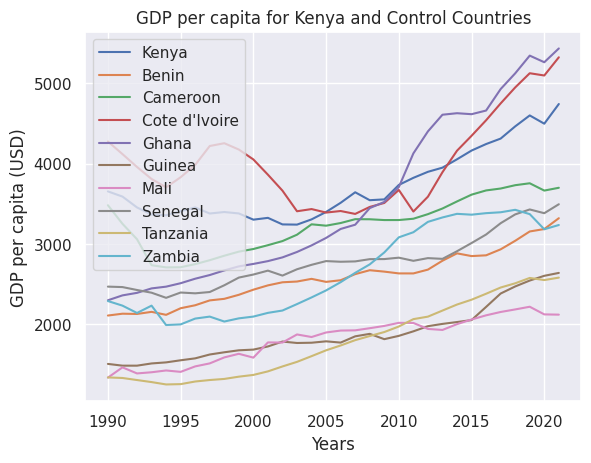

In [74]:
import seaborn as sns
sns.set()

plt.plot(kenya_data['Years'], y, label='Kenya')
for c in control_countries:
  plt.plot(kenya_data['Years'], X[c], label=c)
plt.xlabel('Years')
plt.ylabel('GDP per capita (USD)')
plt.title('GDP per capita for Kenya and Control Countries')
plt.legend()
plt.grid(True)
plt.show()

## Now let's make a synthetic control with log per capita GDP ... this is actually the more appropriate one, given economic growth is multiplicative.

In [75]:
y_log = np.log(kenya_data['GDP per capita'].astype(float))

X_log = pd.DataFrame({k: np.log(v['GDP per capita'].astype(float)) for k,v in df5_controlz.items()})

In [76]:
# Fit a linear regression model to estimate the weights for the control countries
model_log = LinearRegression(fit_intercept=False, positive=True) # notice this change
model_log.fit(X_log, y_log)

coefficients_log = {control_countries[i]:model_log.coef_[i] for i in range(len(control_countries))}
intercept_log = model_log.intercept_

print("Summary of synthetic control:")

for country,coefficient in coefficients_log.items():
  print(f"The coefficient for {country} is {coefficient}.")

#print(f"The intercept for the model is {intercept_log}.")
print(f"The sum of the coefficients is {np.sum([v for v in coefficients_log.values()])}.")

Summary of synthetic control:
The coefficient for Benin is 0.0.
The coefficient for Cameroon is 0.26944374497668355.
The coefficient for Cote d'Ivoire is 0.4147462651066488.
The coefficient for Ghana is 0.0.
The coefficient for Guinea is 0.0.
The coefficient for Mali is 0.0.
The coefficient for Senegal is 0.08713706064056106.
The coefficient for Tanzania is 0.0.
The coefficient for Zambia is 0.24273023563776366.
The sum of the coefficients is 1.0140573063616571.


([<matplotlib.patches.Wedge at 0x7f70cf4be8c0>,
 [Text(0.7452144183358983, 0.8226514879973711, 'Cameroon'),
  Text(-1.0906084922086885, 0.2065747243064628, "Cote d'Ivoire"),
  Text(-0.22393250488217864, -1.0871771857692716, 'Senegal'),
  Text(0.8106684431502383, -0.7582325997214634, 'Zambia')])

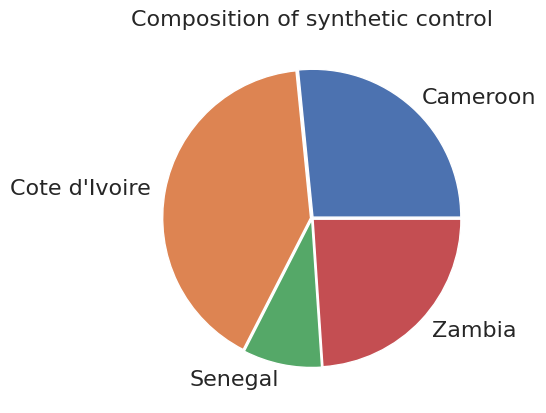

In [77]:
temp = np.array([v for v in coefficients_log.values()])

countries_remaining = np.array(control_countries)[temp>0]
temp = temp[temp>0]

temp /= np.sum(temp)

plt.title('Composition of synthetic control', fontsize=16)
plt.pie(x = temp, explode = [0.01, 0.01, 0.01, 0.01], labels=countries_remaining, textprops={'fontsize':16})

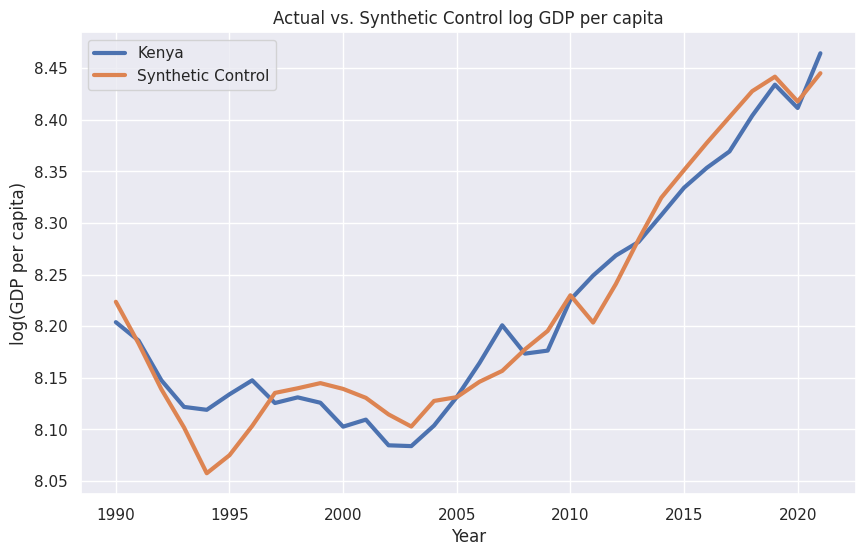

In [78]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot actual GDP per capita of Kenya
plt.plot(kenya_data['Years'], y_log, label = 'Kenya', lw=3)

# Plot synthetic control GDP per capita
plt.plot(kenya_data['Years'], model_log.predict(X_log), label = 'Synthetic Control', lw=3)

plt.xlabel('Year')
plt.ylabel('log(GDP per capita)')
plt.title('Actual vs. Synthetic Control log GDP per capita')
plt.legend();

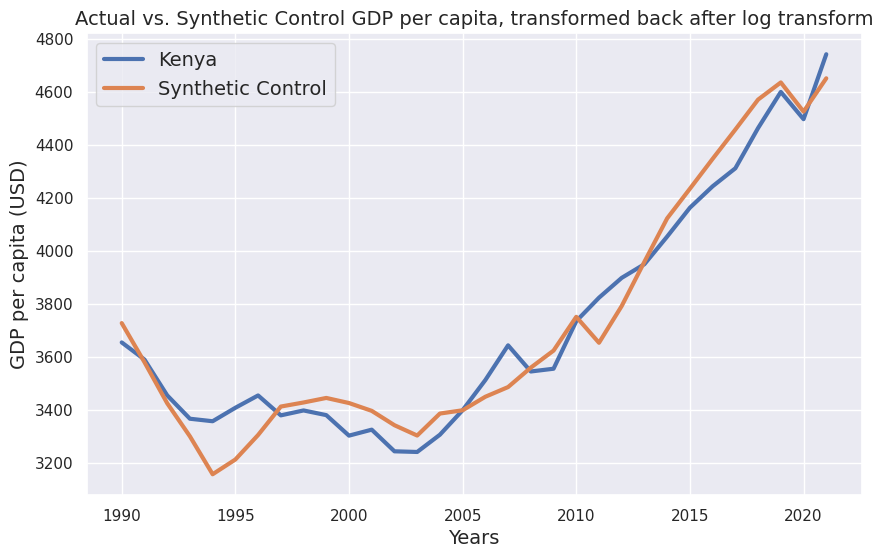

In [79]:
import seaborn as sns
sns.set()

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot actual GDP per capita of Kenya
plt.plot(kenya_data['Years'], np.exp(y_log), label = 'Kenya', lw=3)

# Plot synthetic control GDP per capita
plt.plot(kenya_data['Years'], np.exp(model_log.predict(X_log)), label = 'Synthetic Control', lw=3)

plt.xlabel('Years',fontsize=14)
plt.ylabel('GDP per capita (USD)',fontsize=14)
plt.title('Actual vs. Synthetic Control GDP per capita, transformed back after log transform',fontsize=14)
plt.legend(fontsize=14);

In [80]:
merged_df_f1['govt_exp_edu_per_capita_x'] = merged_df_f1['govt_exp_edu_pct_total_x']/100 * merged_df_f1['tot_govt_exp_pct_gdp']/100 * merged_df_f1['GDP per capita']

# x & y data sources have identical data
#merged_df_f1['govt_exp_edu_per_capita_y'] = merged_df_f1['govt_exp_edu_pct_total_y']/100 * merged_df_f1['tot_govt_exp_pct_gdp']/100 * merged_df_f1['GDP per capita']

merged_df_f1['govt_exp_edu_per_capita_z'] = merged_df_f1['govt_exp_edu_pct_gdp']/100 * merged_df_f1['GDP per capita']

merged_df_f1['govt_exp_prim_edu_per_capita_x'] = merged_df_f1['govt_exp_on_prim_edu_perct_total']/100*merged_df_f1['govt_exp_edu_per_capita_x']
merged_df_f1['govt_exp_prim_edu_per_capita_z'] = merged_df_f1['govt_exp_on_prim_edu_perct_total']/100*merged_df_f1['govt_exp_edu_per_capita_z']

<ipython-input-80-7abd35393118>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_f1['govt_exp_edu_per_capita_x'] = merged_df_f1['govt_exp_edu_pct_total_x']/100 * merged_df_f1['tot_govt_exp_pct_gdp']/100 * merged_df_f1['GDP per capita']
<ipython-input-80-7abd35393118>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_f1['govt_exp_edu_per_capita_z'] = merged_df_f1['govt_exp_edu_pct_gdp']/100 * merged_df_f1['GDP per capita']
<ipython-input-80-7abd35393118>:8: SettingWithCopyWarning: 
A value

# New Analysis

In [81]:
membership = []
temp = np.arange(1,512)

for k in range(9):
  membership.append(temp//(2**(8-k)))
  temp = temp%(2**(8-k))

membership = np.array(membership).T.astype(bool)
membership

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [82]:
syn_ctrl_list = []

for i in range(len(membership)):
  ctrl_set = control_countries[membership[i]]
  df5_controlz = {c : merged_df_f1[merged_df_f1['Country Name'] == c][['Years', 'GDP per capita']].reset_index() for c in ctrl_set}
  X_log = pd.DataFrame({k: np.log(v['GDP per capita'].astype(float)) for k,v in df5_controlz.items()})

  syn_ctrl_list.append(LinearRegression(fit_intercept=False, positive=True))

  syn_ctrl_list[-1].fit(X_log, y_log)


def f(row):
  X_ = row[control_countries]
  idx = np.sum(~X_.isna()*(2**(np.arange(8,-1,-1))))-1
  if idx<0:
    return np.nan
  else:
    X_log = np.log(X_[control_countries[membership[idx]]])
    return np.exp(np.sum(syn_ctrl_list[idx].coef_*X_log))

def g(row):
  X_ = row[control_countries]
  idx = np.sum(~X_.isna()*(2**(np.arange(8,-1,-1))))-1
  if idx<0:
    return np.nan
  else:
    X = X_[control_countries[membership[idx]]]
    return np.sum(syn_ctrl_list[idx].coef_*X)/np.sum(syn_ctrl_list[idx].coef_)

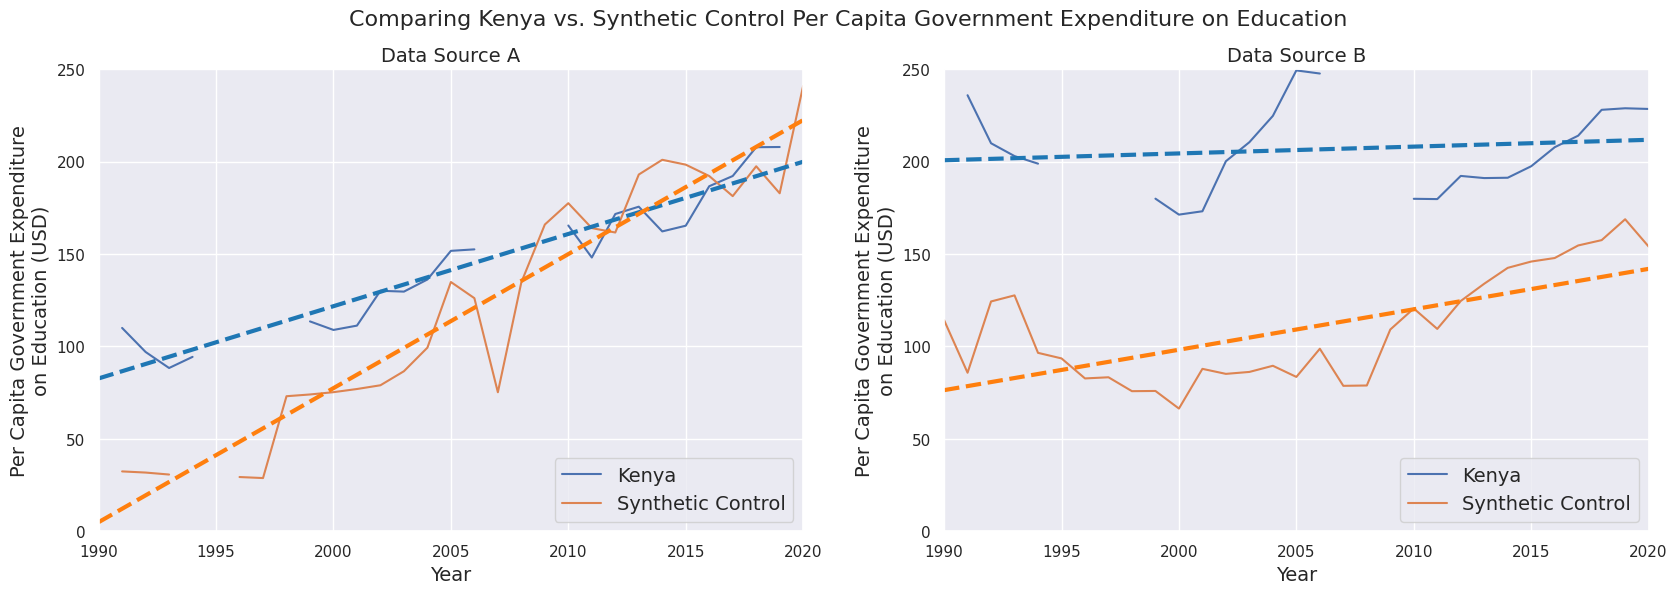

In [83]:
df_edu_exp_pivot_x = merged_df_f1.pivot(index='Years', columns='Country Name', values='govt_exp_edu_per_capita_x')
df_edu_exp_pivot_x['synthetic control'] = df_edu_exp_pivot_x.apply(lambda row: f(row), axis=1)

###############################################################################################

df_edu_exp_pivot_z = merged_df_f1.pivot(index='Years', columns='Country Name', values='govt_exp_edu_per_capita_z')
df_edu_exp_pivot_z['synthetic control'] = df_edu_exp_pivot_z.apply(lambda row: f(row), axis=1)

###############################################################################################

xz = np.arange(1990,2021)

fig, axs = plt.subplots(1,2,figsize=(20,6))
fig.suptitle("Comparing Kenya vs. Synthetic Control Per Capita Government Expenditure on Education", fontsize=16)

max_y = np.ceil(max(np.amax(df_edu_exp_pivot_x['Kenya']),np.amax(df_edu_exp_pivot_z['Kenya'])))

axs[0].set_title('Data Source A', fontsize=14)
# Plot actual per capita government expenditure on education for Kenya
axs[0].plot(df_edu_exp_pivot_x.index, df_edu_exp_pivot_x['Kenya'], label='Kenya', lw=1.5)
axs[0].plot(df_edu_exp_pivot_x.index, df_edu_exp_pivot_x['synthetic control'], label='Synthetic Control', lw=1.5)

axs[0].set_xlim([1990,2020])
axs[0].set_ylim([0, max_y])

axs[0].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Per Capita Government Expenditure\non Education (USD)', fontsize=14)

mask = ~df_edu_exp_pivot_x['Kenya'].isna()
lin_kenya = linregress(df_edu_exp_pivot_x[mask].index, df_edu_exp_pivot_x[mask]['Kenya'])
axs[0].plot(xz,lin_kenya.slope*xz + lin_kenya.intercept, color='#1f77b4', ls='--', lw=3)

mask = ~df_edu_exp_pivot_x['synthetic control'].isna()
lin_sc = linregress(df_edu_exp_pivot_x[mask].index, df_edu_exp_pivot_x[mask]['synthetic control'])
axs[0].plot(xz,lin_sc.slope*xz + lin_sc.intercept, color='#ff7f0e', ls='--', lw=3)

axs[0].legend(loc='lower right', fontsize=14)

############################################################################################################

axs[1].set_title('Data Source B', fontsize=14)

axs[1].plot(df_edu_exp_pivot_z.index, df_edu_exp_pivot_z['Kenya'], label='Kenya', lw=1.5)
axs[1].plot(df_edu_exp_pivot_z.index, df_edu_exp_pivot_z['synthetic control'], label='Synthetic Control', lw=1.5)

axs[1].set_xlim([1990,2020])
axs[1].set_ylim([0, max_y])

axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Per Capita Government Expenditure\non Education (USD)', fontsize=14)

mask = ~df_edu_exp_pivot_z['Kenya'].isna()
lin_kenya = linregress(df_edu_exp_pivot_z[mask].index, df_edu_exp_pivot_z[mask]['Kenya'])
axs[1].plot(xz,lin_kenya.slope*xz + lin_kenya.intercept, color='#1f77b4', ls='--', lw=3)

mask = ~df_edu_exp_pivot_z['synthetic control'].isna()
lin_sc = linregress(df_edu_exp_pivot_z[mask].index, df_edu_exp_pivot_z[mask]['synthetic control'])
axs[1].plot(xz,lin_sc.slope*xz + lin_sc.intercept, color='#ff7f0e', ls='--', lw=3)

axs[1].legend(loc='lower right', fontsize=14);

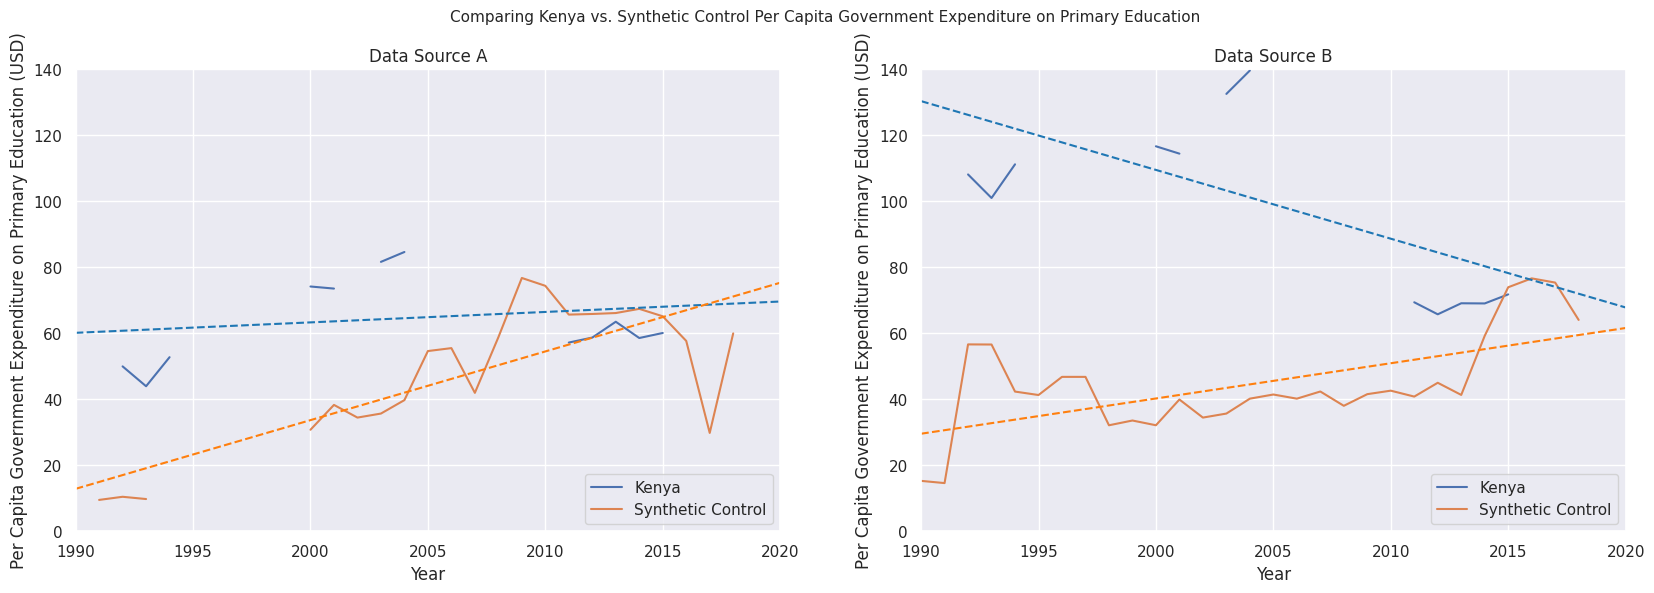

In [84]:
df_prim_edu_exp_pivot_x = merged_df_f1.pivot(index='Years', columns='Country Name', values='govt_exp_prim_edu_per_capita_x')
df_prim_edu_exp_pivot_x['synthetic control'] = df_prim_edu_exp_pivot_x.apply(lambda row: f(row), axis=1)


df_prim_edu_exp_pivot_z = merged_df_f1.pivot(index='Years', columns='Country Name', values='govt_exp_prim_edu_per_capita_z')
df_prim_edu_exp_pivot_z['synthetic control'] = df_prim_edu_exp_pivot_z.apply(lambda row: f(row), axis=1)

###############################################################################################

fig, axs = plt.subplots(1,2,figsize=(20,6))
fig.suptitle("Comparing Kenya vs. Synthetic Control Per Capita Government Expenditure on Primary Education", fontsize=11)

max_y = np.ceil(max(np.amax(df_prim_edu_exp_pivot_x['Kenya']),np.amax(df_prim_edu_exp_pivot_z['Kenya'])))

axs[0].set_title('Data Source A')
# Plot actual per capita government expenditure on education for Kenya
axs[0].plot(df_prim_edu_exp_pivot_x.index, df_prim_edu_exp_pivot_x['Kenya'], label='Kenya')
axs[0].plot(df_prim_edu_exp_pivot_x.index, df_prim_edu_exp_pivot_x['synthetic control'], label='Synthetic Control')

axs[0].set_xlim([1990,2020])
axs[0].set_ylim([0, max_y])

axs[0].set_xlabel('Year')
axs[0].set_ylabel('Per Capita Government Expenditure on Primary Education (USD)')

mask = ~df_prim_edu_exp_pivot_x['Kenya'].isna()
lin_kenya = linregress(df_prim_edu_exp_pivot_x[mask].index, df_prim_edu_exp_pivot_x[mask]['Kenya'])
axs[0].plot(xz,lin_kenya.slope*xz + lin_kenya.intercept, color='#1f77b4', ls='--')

mask = ~df_prim_edu_exp_pivot_x['synthetic control'].isna()
lin_sc = linregress(df_prim_edu_exp_pivot_x[mask].index, df_prim_edu_exp_pivot_x[mask]['synthetic control'])
axs[0].plot(xz,lin_sc.slope*xz + lin_sc.intercept, color='#ff7f0e', ls='--')

axs[0].legend(loc='lower right')

############################################################################################################

axs[1].set_title('Data Source B')

axs[1].plot(df_prim_edu_exp_pivot_z.index, df_prim_edu_exp_pivot_z['Kenya'], label='Kenya')
axs[1].plot(df_prim_edu_exp_pivot_z.index, df_prim_edu_exp_pivot_z['synthetic control'], label='Synthetic Control')

axs[1].set_xlim([1990,2020])
axs[1].set_ylim([0, max_y])

axs[1].set_xlabel('Year')
axs[1].set_ylabel('Per Capita Government Expenditure on Primary Education (USD)')

mask = ~df_prim_edu_exp_pivot_z['Kenya'].isna()
lin_kenya = linregress(df_prim_edu_exp_pivot_z[mask].index, df_prim_edu_exp_pivot_z[mask]['Kenya'])
axs[1].plot(xz,lin_kenya.slope*xz + lin_kenya.intercept, color='#1f77b4', ls='--')

mask = ~df_prim_edu_exp_pivot_z['synthetic control'].isna()
lin_sc = linregress(df_prim_edu_exp_pivot_z[mask].index, df_prim_edu_exp_pivot_z[mask]['synthetic control'])
axs[1].plot(xz,lin_sc.slope*xz + lin_sc.intercept, color='#ff7f0e', ls='--')

axs[1].legend(loc='lower right');

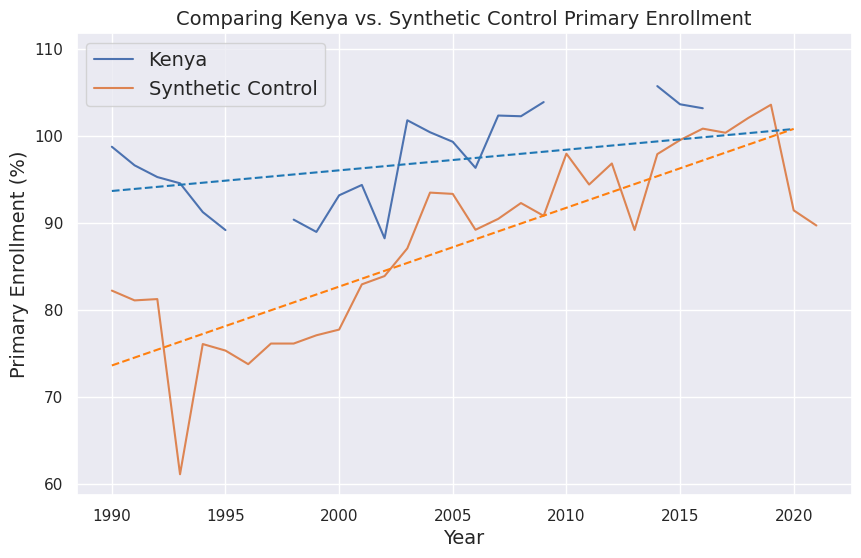

In [85]:
df_prim_enrl_pivot = merged_df_f1.pivot(index='Years', columns='Country Name', values='primary_enrollment')
df_prim_enrl_pivot['synthetic control'] = df_prim_enrl_pivot.apply(lambda row: g(row), axis=1)

plt.figure(figsize=(10, 6))

# Plot actual per capita government expenditure on education for Kenya
plt.plot(df_prim_enrl_pivot.index, df_prim_enrl_pivot['Kenya'], label='Kenya')

# Plot synthetic control government expenditure on education
plt.plot(df_prim_enrl_pivot.index, df_prim_enrl_pivot['synthetic control'], label='Synthetic Control')

mask = ~df_prim_enrl_pivot['Kenya'].isna()
lin_kenya = linregress(df_prim_enrl_pivot[mask].index, df_prim_enrl_pivot[mask]['Kenya'])
plt.plot(xz,lin_kenya.slope*xz + lin_kenya.intercept, color='#1f77b4', ls='--')

mask = ~df_prim_enrl_pivot['synthetic control'].isna()
lin_sc = linregress(df_prim_enrl_pivot[mask].index, df_prim_enrl_pivot[mask]['synthetic control'])
plt.plot(xz,lin_sc.slope*xz + lin_sc.intercept, color='#ff7f0e', ls='--')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary Enrollment (%)', fontsize=14)
plt.title('Comparing Kenya vs. Synthetic Control Primary Enrollment', fontsize=14)
plt.legend(fontsize=14);

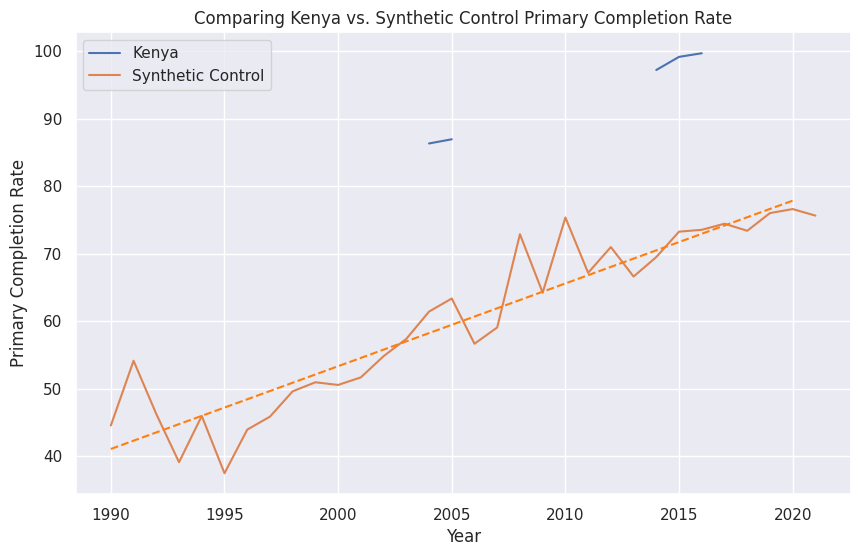

In [86]:
df_prim_comp_pivot = merged_df_f1.pivot(index='Years', columns='Country Name', values='primary_completion_rate')
df_prim_comp_pivot['synthetic control'] = df_prim_comp_pivot.apply(lambda row: f(row), axis=1)

plt.figure(figsize=(10, 6))

# Plot actual per capita government expenditure on education for Kenya
plt.plot(df_prim_comp_pivot.index, df_prim_comp_pivot['Kenya'], label='Kenya')

# Plot synthetic control government expenditure on education
plt.plot(df_prim_comp_pivot.index, df_prim_comp_pivot['synthetic control'], label='Synthetic Control')

mask = ~df_prim_enrl_pivot['synthetic control'].isna()
lin_sc = linregress(df_prim_comp_pivot[mask].index, df_prim_comp_pivot[mask]['synthetic control'])
plt.plot(xz,lin_sc.slope*xz + lin_sc.intercept, color='#ff7f0e', ls='--')

plt.xlabel('Year')
plt.ylabel('Primary Completion Rate')
plt.title('Comparing Kenya vs. Synthetic Control Primary Completion Rate')
plt.legend();

# Old Code

In [87]:

# Step 1: Clean the data in the "Government expenditure (Education)" column and log-transform the per capita government expenditure on merged_df
merged_df['log_pc_govt_exp_ed'] = np.log(pd.to_numeric(merged_df['per_capita_govt_expenditure_on_education'], errors='coerce'))

# Convert 'GDP per capita' column to numeric
merged_df['GDP per capita'] = pd.to_numeric(merged_df['GDP per capita'], errors='coerce')

# Remove rows with NaN values in the 'log_education_expenditure' column
merged_df = merged_df.dropna(subset=['log_pc_govt_exp_ed', 'GDP per capita'])

kenya_log_education = np.array(merged_df[merged_df['Country Name'] == 'Kenya'][['log_pc_govt_exp_ed']].reset_index(drop=True))
log_education_controlz = {c : merged_df[merged_df['Country Name'] == c][['Years', 'log_pc_govt_exp_ed']].reset_index() for c in control_countries}

X = pd.DataFrame({k: v['log_pc_govt_exp_ed'].astype(float) for k,v in log_education_controlz.items()})

control_log_education = model_log.predict(X)

control_log_education


KeyError: ignored

In [ ]:
plt.figure(figsize=(10, 6))

# Plot actual per capita government expenditure on education for Kenya
plt.plot(kenya_data['Years'], np.exp(kenya_log_education), label='Kenya')

# Plot synthetic control government expenditure on education
plt.plot(kenya_data['Years'], np.exp(control_log_education), label='Synthetic Control')

plt.xlabel('Year')
plt.ylabel('Government Expenditure on Education')
plt.xlim([2008,2020])
plt.title('Comparing Kenya vs. Synthetic Control Government Expenditure on Education')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
merged_df

In [ ]:
merged_df_super = pd.merge(merged_df, df2_melt, on=['Country Name', 'Years'], how='inner')
merged_df_super = pd.merge(merged_df_super, df3_melt, on=['Country Name', 'Years'], how='inner')
merged_df_super

In [ ]:
np.unique(merged_df_super['Country Name'], return_counts=True)

In [ ]:
merged_df_super.columns

In [ ]:
kenya_prim_enroll = np.array(merged_df_super[merged_df_super['Country Name'] == 'Kenya'][['primary_enrollment']].reset_index(drop=True))
prim_enroll_controlz = {c : merged_df_super[merged_df_super['Country Name'] == c][['Years', 'primary_enrollment']].reset_index() for c in control_countries}

X = pd.DataFrame({k: v['primary_enrollment'].astype(float) for k,v in prim_enroll_controlz.items()})

#control_prim_enroll = model_log.predict(X)

#control_prim_enroll

In [ ]:
df3_melt

In [ ]:
df1_dict = {c : df1_melt[df1_melt['Country Name'] == c][['Years', 'govt_exp_on_prim_edu_perct_total']].reset_index(drop=True) for c in control_countries}
df1_new = df1_melt[df1_melt['Country Name'] == 'Kenya'][['Years', 'govt_exp_on_prim_edu_perct_total']].reset_index(drop=True).rename(columns={'govt_exp_on_prim_edu_perct_total':'Kenya'})

for k,v in df1_dict.items():
  df1_new = pd.merge(df1_new, v.rename(columns={'govt_exp_on_prim_edu_perct_total':k}), on='Years', how='outer')

df1_new.sort_values(by='Years', inplace=True)

########################################################################################

df2_dict = {c : df2_melt[df2_melt['Country Name'] == c][['Years', 'primary_completion_rate']].reset_index(drop=True) for c in control_countries}
df2_new = df2_melt[df2_melt['Country Name'] == 'Kenya'][['Years', 'primary_completion_rate']].reset_index(drop=True).rename(columns={'primary_completion_rate':'Kenya'})

for k,v in df2_dict.items():
  df2_new = pd.merge(df2_new, v.rename(columns={'primary_completion_rate':k}), on='Years', how='outer')

df2_new.sort_values(by='Years', inplace=True)

########################################################################################

df3_dict = {c : df3_melt[df3_melt['Country Name'] == c][['Years', 'primary_enrollment']].reset_index(drop=True) for c in control_countries}
df3_new = df3_melt[df3_melt['Country Name'] == 'Kenya'][['Years', 'primary_enrollment']].reset_index(drop=True).rename(columns={'primary_enrollment':'Kenya'})

for k,v in df3_dict.items():
  df3_new = pd.merge(df3_new, v.rename(columns={'primary_enrollment':k}), on='Years', how='outer')

df3_new.sort_values(by='Years', inplace=True)



In [ ]:
plt.plot(df2_new['Years'], df2_new['Kenya'], label='Kenya')
for c in control_countries:
  plt.plot(df2_new['Years'], df2_new[c], label=c)
plt.xlabel('Years')
plt.ylabel('Primary completion rate')
plt.title('Primary completion rate for Kenya and Control Countries')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(df3_new['Years'], df3_new['Kenya'], label='Kenya')
for c in control_countries:
  plt.plot(df3_new['Years'], df3_new[c], label=c)
plt.xlabel('Years')
plt.ylabel('Primary enrollment rate')
plt.title('Primary enrollment rate for Kenya and Control Countries')
plt.legend()
plt.grid(True)
plt.show()